# ANN to predict different characters

### importing dependecies

In [1]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2021-12-08 09:13:34.344067: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-08 09:13:34.344092: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### traning data

In [2]:
training_data = np.array([[1,1,0,0,1,0,0,1,0,0,1,0], [1,1,1,0,1,0,0,1,0,0,1,0], [1,0,0,1,0,0,1,0,0,1,1,1], [1,1,1,1,0,1,1,0,1,1,1,1]], "float32")

#### OneHotEncoder will convert the data to an array on (1, 4) floats

In [3]:
target_data = [['1'], ['T'], ['L'], ['0']]
encoder = OneHotEncoder()
backup = target_data
encoder.fit(target_data)
target_data = encoder.transform(target_data).toarray()
print(target_data)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


#### a function to decode encoded data from one hot enoder

In [4]:
def decode(output_data, test_data):
    array = []
    for data in output_data:
        for i in range(len(test_data)):
            x = encoder.transform([test_data[i]]).toarray()
            if np.array_equal([data], x) == True:
                array += [test_data[i]]
        i += 1
    return array

Here I have added two layers 1st layer is input layer and takes 12 data next layer takes 8 input fields and outputs 4 fileds as in to depict one hot encoded data array

In [5]:
model = tf.keras.models.Sequential()
#adding Layers
model.add(tf.keras.layers.Dense(8, input_dim=12, activation='sigmoid'))
model.add(tf.keras.layers.Dense(4, input_dim=8, activation='sigmoid'))

2021-12-08 09:13:38.664748: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 09:13:38.666067: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-08 09:13:38.666258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-12-08 09:13:38.666619: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-12-08 09:13:38.666882: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [6]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['binary_accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


### Training NN now

In [8]:
history = model.fit(training_data, target_data, epochs=200, verbose=2)

Epoch 1/200
1/1 - 0s - loss: 0.2519 - binary_accuracy: 0.5625 - 383ms/epoch - 383ms/step
Epoch 2/200
1/1 - 0s - loss: 0.2434 - binary_accuracy: 0.5000 - 2ms/epoch - 2ms/step
Epoch 3/200
1/1 - 0s - loss: 0.2354 - binary_accuracy: 0.5000 - 3ms/epoch - 3ms/step
Epoch 4/200
1/1 - 0s - loss: 0.2279 - binary_accuracy: 0.6250 - 2ms/epoch - 2ms/step
Epoch 5/200
1/1 - 0s - loss: 0.2211 - binary_accuracy: 0.6875 - 3ms/epoch - 3ms/step
Epoch 6/200
1/1 - 0s - loss: 0.2148 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 7/200
1/1 - 0s - loss: 0.2091 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 8/200
1/1 - 0s - loss: 0.2039 - binary_accuracy: 0.7500 - 2ms/epoch - 2ms/step
Epoch 9/200
1/1 - 0s - loss: 0.1993 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 10/200
1/1 - 0s - loss: 0.1952 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 11/200
1/1 - 0s - loss: 0.1915 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 12/200
1/1 - 0s - loss: 0.1883 - binary_accuracy: 0.7

### Predicting Results

In [9]:
output_data = model.predict(training_data).round()
td = np.array(training_data)
arr = decode(output_data, backup)
arr = np.array(arr)
arr.reshape((4, 1))
arr = np.block([td, arr])
print(arr)


[['1.0' '1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0'
  '1']
 ['1.0' '1.0' '1.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0'
  'T']
 ['1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '1.0' '1.0'
  'L']
 ['1.0' '1.0' '1.0' '1.0' '0.0' '1.0' '1.0' '0.0' '1.0' '1.0' '1.0' '1.0'
  '0']]


In [10]:
from sklearn.metrics import r2_score
r2_score(target_data, output_data)

1.0

In [11]:
loss_curve = history.history["loss"]
acc_curve = history.history["binary_accuracy"]

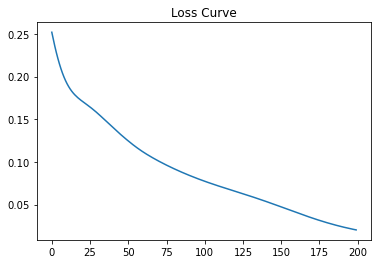

In [12]:
plt.plot(loss_curve, label='Train')
plt.title('Loss Curve')
plt.show()

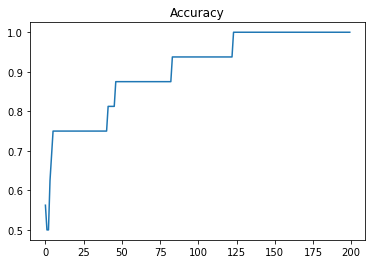

In [13]:
plt.plot(acc_curve, label='Train')
plt.title('Accuracy')
plt.show()

# Weights and biases from all the layers

### Layer 0

In [14]:
np.array(model.layers[0].weights)

/tmp/ipykernel_57025/1907337383.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(model.layers[0].weights)


array([<tf.Variable 'dense/kernel:0' shape=(12, 8) dtype=float32, numpy=
       array([[-0.04553116,  1.1959479 ,  0.29356855,  0.05615046, -0.04027945,
                0.25640908, -0.6618602 , -0.2918619 ],
              [ 1.3331301 , -0.60007983,  0.17483889,  0.15646194,  1.0829903 ,
                0.12098861,  1.1317749 , -0.30679482],
              [-1.93812   , -1.3398073 , -2.1938498 ,  1.6215302 ,  0.79801893,
               -1.5905781 ,  2.2958856 ,  0.52933985],
              [-0.16943903, -0.12270562, -0.61836743,  1.1084924 , -1.1510215 ,
                0.39046955, -0.42674848,  0.5594738 ],
              [ 0.0874173 ,  0.49181572,  0.75057423, -0.3097841 ,  0.10072627,
               -0.6483455 , -0.5309229 , -1.0865264 ],
              [ 1.5164233 , -1.3081752 ,  0.09327473, -0.38582307,  1.5744913 ,
                0.6575471 ,  1.8605705 ,  0.9125434 ],
              [ 0.00993828, -0.2253759 , -0.94315726,  1.140666  , -0.6483985 ,
                0.46058232, -0.179813

In [15]:
model.layers[0].bias.numpy()

array([-0.12948552,  0.81628567,  0.01362001,  0.03100564,  0.3389845 ,
        0.43889198, -0.69633967, -0.25534052], dtype=float32)

### Layer 1

In [16]:
model.layers[1].weights

[<tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[ 1.500935  ,  1.1087834 , -2.0512905 , -1.7418822 ],
        [-1.9702976 ,  0.17327277,  0.7376685 ,  0.5282222 ],
        [-1.0133072 ,  2.003909  , -1.6115173 , -0.7806116 ],
        [-1.2825342 , -1.1942817 ,  0.9159209 ,  0.6183726 ],
        [ 0.13836594, -0.02894274, -2.0899131 ,  0.60425764],
        [ 0.7559351 , -0.47290844,  0.9411677 , -2.361369  ],
        [ 1.0536734 , -0.6570531 , -1.862814  ,  0.7152399 ],
        [ 0.797985  , -1.2667956 ,  0.69983965, -1.015922  ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=
 array([-7.09166348e-01, -4.02186573e-01,  4.10368741e-02, -1.20386714e-04],
       dtype=float32)>]

In [18]:
model.layers[1].bias.numpy()

array([-7.09166348e-01, -4.02186573e-01,  4.10368741e-02, -1.20386714e-04],
      dtype=float32)

In [19]:
model.save('my_model')

2021-12-08 09:14:20.032828: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: my_model/assets


In [21]:
model = tf.keras.models.Sequential()
model.load_weights('my_model/keras_metadata.pb')

2021-12-08 09:16:58.889005: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open my_model/keras_metadata.pb: DATA_LOSS: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?


ValueError: Unable to load weights saved in HDF5 format into a subclassed Model which has not created its variables yet. Call the Model first, then load the weights.